### Variational monte carlo method for ground state calculation of Simple harmonic oscillator

The wavefunction and the corresponding operators used are:  
$\ $  

1. $\psi = \dfrac{\sqrt(\alpha)}{\pi^{\frac{1}{4}}}\exp(-\dfrac{\alpha^2x^2}{2}),\ \ \hat H = \dfrac{-\hbar^2}{2m}\dfrac{d^2}{dx^2} + \dfrac{1}{2}kx^2$   
$\ $  

2. $|\psi|^2 = \dfrac{\alpha}{\sqrt\pi}\exp(-\alpha^2x^2)$, is a Gaussian distribution whose std_dev = $\dfrac{1}{\sqrt2\alpha}$  
$\ $  

3. $<\hat H>\ =\ \int_{-\infty}^{\infty}\psi^{*}\hat H\psi dx\ =\ \int_{-\infty}^{\infty}\dfrac{\psi\psi^{*}\hat H\psi}{\psi} dx$  
$\ $

    $=\ \int_{-\infty}^{\infty}|\psi|^{2} E_L(x) dx\ =\ \int_{-\infty}^{\infty}p(x) E_L(x) dx$,  
    $\ $
    
    where, $p(x) = prob\ =\ |\psi|^2\ and\ E_L(x) =\ energy\_loc\ =\ \dfrac{\hat H\psi}{\psi}$  
$\ $

4. $E_L(x) = \dfrac{\hat H\psi}{\psi} = \alpha^2 + x^2(1 - \alpha^4)$,  
$\ $  
for $\dfrac{\hbar^2}{2m} = \dfrac{k}{2} = 1$
$\ $  
$\ $  

Theoretically,  
$<\hat H>\ = \int_{-\infty}^{\infty}|\psi|^{2} E_L(x) dx = \dfrac{\alpha^2}{2} + \dfrac{1}{2\alpha^2}\ \ $and  
$\ $  
$variance = \sigma^2 = \dfrac{(\alpha^4 - 1)^2}{2\alpha^4}$  
$\ $  
$\ $  

In the simulation, the average and variance is calculated from the following,  
$\ $  

$<H> = \dfrac{1}{N}\sum_{i=1}^{N}E_L(x_i)$  
$\ $  
$<H^2> = \dfrac{1}{N}\sum_{i=1}^{N}E_L^2(x_i)$

#### Basic imports, making directories for storing data and function definitions

In [1]:
# %%writefile  shm_mc.py
import os
import numpy as np
import time as T
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

# for making directories for saving data files
curr_dir = os.getcwd()
path = []
name = ["Energy","Position_Gauss","Rand_Change","Position_New","Position_Accepted","Accept_Reject_Probability_Samples"]

# making a directory called "data" to store all induvidual directories
data_dir = os.path.join(curr_dir,"Data_SHM")
try:
    os.mkdir(data_dir)
except FileExistsError:
    pass
except:
    print("Check if paths are created for data files")

# making subdirectories inside data and appending to path[path = list_type]
once = True
for item in name:
    full_path = os.path.join(data_dir,item)
    try:
        os.mkdir(full_path)
        path.append(full_path)
    except FileExistsError:
        path.append(full_path)
    except:
        if once:
            print("Check if paths are created for data files")
            once = False

    
def psi(alpha, x):
    """Calculates the value of the trial wavefunction at position x and variational parameter alpha 
    (unused in current code)
    """
    return (np.sqrt(alpha)/(np.pi)**(0.25))*(np.exp(-(alpha**2)*(x**2)/2))

def prob(alpha, x):
    """Calculates the probability density at the given position x for the trial wavefunction with 
    the variational parameter alpha
    """
    return (alpha/np.sqrt(np.pi))*(np.exp(-(alpha**2)*(x**2)))

def energy_loc(alpha, x):
    """Calculates the 'local energy' given by (\hatH\psi)/(\psi) at given x and alpha value
    """
    return (alpha**2 + (x**2*(1 - alpha**4)))

def sigma_for_normal_dist(alpha):
    """Calculates the standard deviation value for each alpha, to be used for generating random sample from 
    normal distribution
    """
    return 1/(np.sqrt(2)*alpha)

def energy_avg_theo(alpha):
    """Calculates the theoretical value of avg. energy for each alpha value
    """
    return (alpha**2/2) + (1/(2*alpha**2))

def variance_theo(alpha):
    """Calculates the theoretical value of variance in energy for each value of alpha
    """
    return ((alpha**4 - 1)**2) / (2*alpha**4)

#### Calculation by directly sampling a Gaussian distribution of appropriate $\sigma$

In [2]:
# %%writefile -a shm_mc.py
""" Method1 where the x positions are directly sampled from a Gaussian distribution
"""
t1 = T.time()
steps = 200000 #no.of steps in the mc simulation
avg_after = 0.25*steps #no.of steps after which energy, energy_square are summed to calculate avg
alpha_low = 0.5; alpha_high = 1.6; alpha_step = 0.1 #step size for varying alpha from alpha_low to alpha_high
alpha_no = (alpha_high - alpha_low)/alpha_step
result = []

for alpha in np.arange(alpha_low,alpha_high,alpha_step): #alpha is varied from 0.1 to 2 in steps of 0.1
    
    e_l = 0 #stores the 'local energy' value
    e_l_sq = 0 #stores the square of the 'local energy' value
    s = sigma_for_normal_dist(alpha) #the standard deviation value to be used for generating the gaussian random number
    

    alpha_name = "alpha_" + str(round(alpha,2)) + ".txt"
    file_name1 = os.path.join(path[0],alpha_name)
    file_name2 = os.path.join(path[1],alpha_name)

    f1 = open(file_name1,"w")
    f2 = open(file_name2,"w")

    
    for i in range(steps):
        if i > avg_after:
            
            x = np.random.normal(0,s) #x position chosen from a gaussian distribution
            e = energy_loc(alpha,x)
            
            f1.write(str(i)+"\t"+str(round(e,2))+"\n")
            f2.write(str(i)+"\t"+str(round(x,2))+"\n")
            
            e_l += e
            e_l_sq += e*e
    
    f1.close()
    f2.close()
    
    e_l_avg = e_l/(steps - avg_after) #average value of energy
    e_l_sq_avg = e_l_sq/(steps - avg_after) #average value of energy^2
    variance = e_l_sq_avg - (e_l_avg**2) #calculation of variance
    result.append([alpha,e_l_avg,variance,energy_avg_theo(alpha),variance_theo(alpha)])

t2 = T.time()
print("Time taken to run the process for {} steps for {} alpha values is {}s\n".format(steps,int(alpha_no),\
                                                                                       round((t2-t1),2)))
print(u"Energy_th =\t \u03b1\u00b2/2 + 1/2\u03b1\u00b2\n")
print(u"Variance_th =\t (\u03b1\u2074-1)\u00b2/2\u03b1\u2074\n")
print("alpha\tEnergy_avg\tEnergy_th\tVariance\tVariance_th")
for item in result:
    print(str(round(item[0],2))+"\t"+str(round(item[1],2))+"\t\t"+str(round(item[3],2))+\
          "\t\t"+str(round(item[2],2))+"\t\t"+str(round(item[4],2)))

Time taken to run the process for 200000 steps for 11 alpha values is 13.05s

Energy_th =	 α²/2 + 1/2α²

Variance_th =	 (α⁴-1)²/2α⁴

alpha	Energy_avg	Energy_th	Variance	Variance_th
0.5	2.13		2.12		7.1		7.03
0.6	1.57		1.57		2.94		2.92
0.7	1.26		1.27		1.19		1.2
0.8	1.1		1.1		0.43		0.43
0.9	1.02		1.02		0.09		0.09
1.0	1.0		1.0		0.0		0.0
1.1	1.02		1.02		0.07		0.07
1.2	1.07		1.07		0.28		0.28
1.3	1.14		1.14		0.61		0.6
1.4	1.23		1.24		1.07		1.05
1.5	1.34		1.35		1.64		1.63


#### Histogram plot of energy 

alpha_value for plotting energies(0.5 to 1.5), eg. 1.1 : 1.1

mean = 1.01823172154481, std_dev = 0.2717854919990666


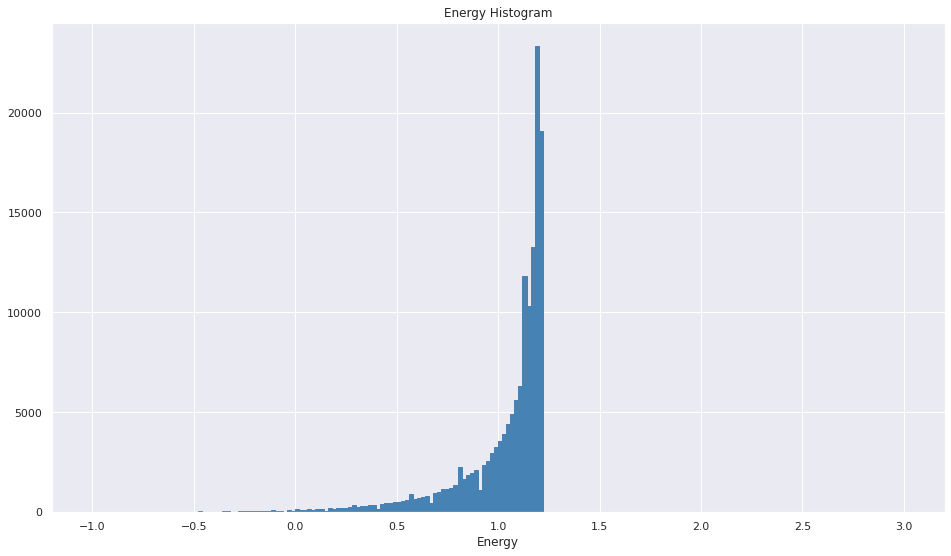

In [3]:
# %%writefile -a shm_mc.py
# to plot the energy values

x = input("alpha_value for plotting energies({} to {}), eg. 1.1 : ".format(alpha_low,alpha_high-0.1))

energy_file = os.path.join(path[0],"alpha_"+ x +".txt")
q = np.loadtxt(energy_file)

val = q[:,1]

plt.figure(figsize = (16,9))
# plt.scatter(q[98000:,0],q[98000:,1])`
plt.hist(val,bins=200, color='steelblue', ec='steelblue', range=[-1,3])
print("\nmean = {}, std_dev = {}".format(val.mean(), val.std()))
plt.xlabel("Energy")
plt.title("Energy Histogram")
plt.show()

#### x positions obtained from Gaussian distribution

alpha_value for plotting x from normal distribution(0.5 to 1.5), eg. 1.1 : 1.1

mean = -0.003178554523696825, std_dev = 0.6430183066409896


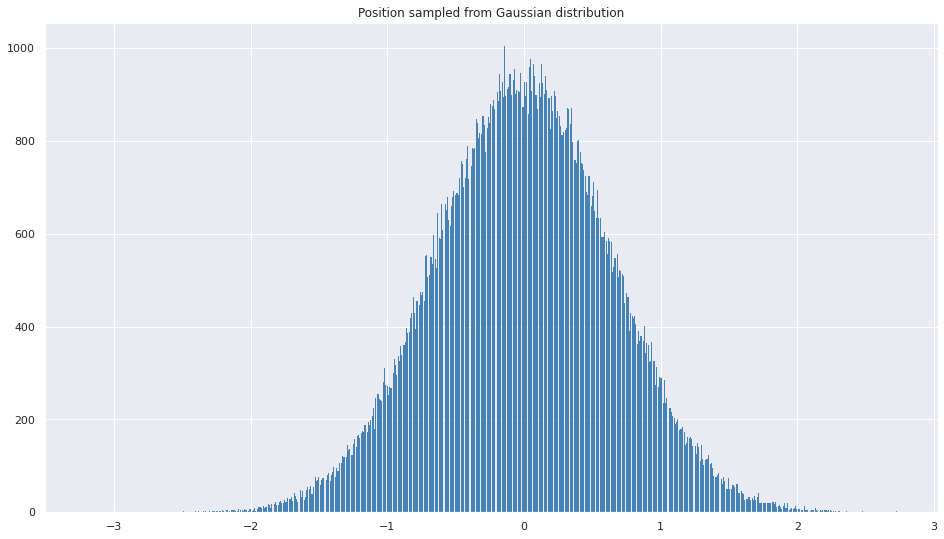

In [4]:
# %%writefile -a shm_mc.py
# to plot the x values obtained from the gaussian distribution

x = input("alpha_value for plotting x from normal distribution({} to {}), eg. 1.1 : "\
          .format(alpha_low,alpha_high-0.1))

pos_gauss_file = os.path.join(path[1],"alpha_"+ x +".txt")
q = np.loadtxt(pos_gauss_file)

val = q[:,1]

plt.figure(figsize = (16,9))
plt.hist(val, bins=750, color = 'steelblue', ec = 'steelblue', lw=0)
print("\nmean = {}, std_dev = {}".format(val.mean(),val.std()))
plt.title("Position sampled from Gaussian distribution")
plt.show()

#### Calculation by Metropolis algorithm

In [5]:
# %%writefile -a shm_mc.py
""" Method2 where the x positions are sampled according to the Metropolis algorithm
"""
t1 = T.time()
x_pos = -20 #starting x position for the simulation
steps = 200000 #no.of steps in the mc simulation
avg_after = 0.25*steps #no.of steps after which energy, energy_squared is summed to calculate avg
alpha_low = 0.5; alpha_high = 1.6; alpha_step = 0.1 #step size for varying alpha from alpha_low to alpha_high
alpha_no = (alpha_high - alpha_low)/alpha_step
result2 = []
prob_samples_req = 100 #no.of samples to be collected for displaying the probability of the move(below hundred desirable)
p_samp = int((steps - avg_after)/prob_samples_req)


for alpha in np.arange(alpha_low,alpha_high,alpha_step): #alpha is varied from 0.1 to 2 in steps of 0.1
    e_l = 0 #for storing energy value
    e_l_squared = 0 #for energy^2 value
    counter = 0 #to get the number of steps that are accepted by the metropolis algo
    
    alpha_name = "alpha_" + str(round(alpha,2)) + ".txt"
    file_name3 = os.path.join(path[2],alpha_name)
    file_name4 = os.path.join(path[3],alpha_name)
    file_name5 = os.path.join(path[4],alpha_name)
    file_name6 = os.path.join(path[5],alpha_name)

    
    f3 = open(file_name3, "w")
    f4 = open(file_name4, "w")
    f5 = open(file_name5, "w")
    f6 = open(file_name6, "w")
    

    f6.write("Sample_no.\t\tProb_new\t\tProb_now\t\tRatio\t\tRand_no_generated\tStatus\n")

    for i in range(steps):
        if i > avg_after:
            rand_change = -1 + 2*np.random.rand() #generating a random value between -1 and 1
            f3.write(str(i)+"\t"+str(round(rand_change,2))+"\n") #random changes generated
            
            x_new = x_pos + rand_change #new random x position
#             x_new = x_pos + 2*rand_change #new random x position

            p_now = prob(alpha,x_pos) #probability density at the previous position
            p_new = prob(alpha,x_new) #probability density at the new position
            
            if p_new >= p_now:
                x_pos = x_new #accepting the new position
                counter += 1
                
                #storing some of the probability values for checking acceptance likelihood
                if i%p_samp == 0:
                    f6.write(str(i).zfill(6)+"\t\t"+str(round(p_new,2))+"\t\t\t"+str(round(p_now,2))+"\t\t\t"+\
                             str(round((p_new/p_now),2))+"\t\t"+"0\t\t\tAccepted\n")

            else:
                prob_val_for_comp = np.random.rand()
                if (p_new/p_now) > np.random.rand():
#                 if (p_new) > prob_val_for_comp: 
                    x_pos = x_new #again accepting the new position, this time if the ratio of 
                    #the probabilities is greater than the random number generated
                    counter += 1

                    #storing some of the probability values for checking acceptance likelihood
                    if i%p_samp == 0:
                        f6.write(str(i).zfill(6)+"\t\t"+str(round(p_new,2))+"\t\t\t"+str(round(p_now,2))+"\t\t\t"+\
                             str(round((p_new/p_now),2))+"\t\t"+str(round(prob_val_for_comp,2))+"\t\t\tAccepted\n")
                else:
                    #storing some of the probability values for checking acceptance likelihood
                    if i%p_samp == 0:
                        f6.write(str(i).zfill(6)+"\t\t"+str(round(p_new,2))+"\t\t\t"+str(round(p_now,2))+"\t\t\t"+\
                             str(round((p_new/p_now),2))+"\t\t"+str(round(prob_val_for_comp,2))+"\t\t\tRejected\n")

            f4.write(str(i)+"\t"+str(round(x_new,2))+"\n") #all new x positions generated
            f5.write(str(i)+"\t"+str(round(x_pos,2))+"\n") #only the accepted x positions

            e = energy_loc(alpha,x_pos)
            e_l += e
            e_l_squared += e*e
        
    f3.close()
    f4.close()
    f5.close()
    f6.close()
    
    el_avg = e_l/(steps - avg_after) #average value of energy
    el_sq_avg = e_l_squared/(steps - avg_after) #average value of energy^2
    variance = el_sq_avg - (el_avg**2) #calculation of variance
    result2.append([alpha,el_avg,energy_avg_theo(alpha),variance,variance_theo(alpha),(counter/(steps-avg_after))*100])

t2 = T.time()    
print("Time taken to run the process for {} steps for {} alpha values is {}s\n".format(steps,int(alpha_no),\
                                                                                       round((t2-t1),2)))
print(u"Energy_th =\t \u03b1\u00b2/2 + 1/2\u03b1\u00b2\n")
print(u"Variance_th =\t (\u03b1\u2074-1)\u00b2/2\u03b1\u2074\n")
print("alpha\tEnergy_avg\tEnergy_th\tVariance\tVariance_th\tAcceptance_prob")
for item in result2:
    print(str(round(item[0],2))+"\t"+str(round(item[1],2))+"\t\t"+str(round(item[2],2))+\
          "\t\t"+str(round(item[3],2))+"\t\t"+str(round(item[4],2))+"\t\t"+str(round(item[5],2)))

Time taken to run the process for 200000 steps for 11 alpha values is 16.31s

Energy_th =	 α²/2 + 1/2α²

Variance_th =	 (α⁴-1)²/2α⁴

alpha	Energy_avg	Energy_th	Variance	Variance_th	Acceptance_prob
0.5	2.21		2.12		26.69		7.03		86.01
0.6	1.55		1.57		2.82		2.92		83.56
0.7	1.26		1.27		1.17		1.2		80.62
0.8	1.1		1.1		0.42		0.43		77.99
0.9	1.02		1.02		0.09		0.09		75.55
1.0	1.0		1.0		0.0		0.0		73.02
1.1	1.02		1.02		0.07		0.07		70.48
1.2	1.07		1.07		0.27		0.28		67.89
1.3	1.15		1.14		0.57		0.6		65.67
1.4	1.23		1.24		1.09		1.05		63.71
1.5	1.34		1.35		1.64		1.63		61.37


#### Histogram plot of the random changes(uniform distribution) generated

alpha_value for plotting random changes(-1 to 1) generated (0.5 to 1.5), eg. 1.1 : 1.1

mean = -0.0002582683884559225, std_dev = 0.5779019984126628


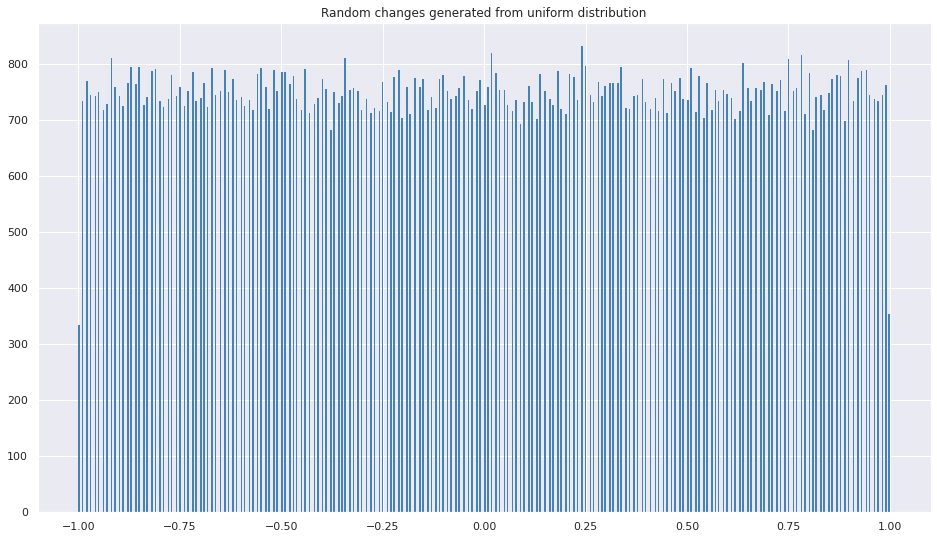

In [6]:
# %%writefile -a shm_mc.py
# to plot the uniform distribution (random change) generated

x = input("alpha_value for plotting random changes(-1 to 1) generated ({} to {}), eg. 1.1 : "\
          .format(alpha_low,alpha_high-0.1))

rand_change_file = os.path.join(path[2],"alpha_"+ x +".txt")
q = np.loadtxt(rand_change_file)

val = q[:,1]

plt.figure(figsize = (16,9))
plt.hist(val,bins=500, color = 'steelblue', ec='steelblue', lw=0)
plt.title("Random changes generated from uniform distribution")
# plt.scatter(x0[:,0],x2[:,1])
print("\nmean = {}, std_dev = {}".format(val.mean(), val.std()))
plt.show()

#### Plot of the new x positions generated

alpha_value for plotting new x positions generated (0.5 to 1.5), eg. 1.1 : 1.1

mean = -0.0036105574037160245, std_dev = 0.8636312509910657


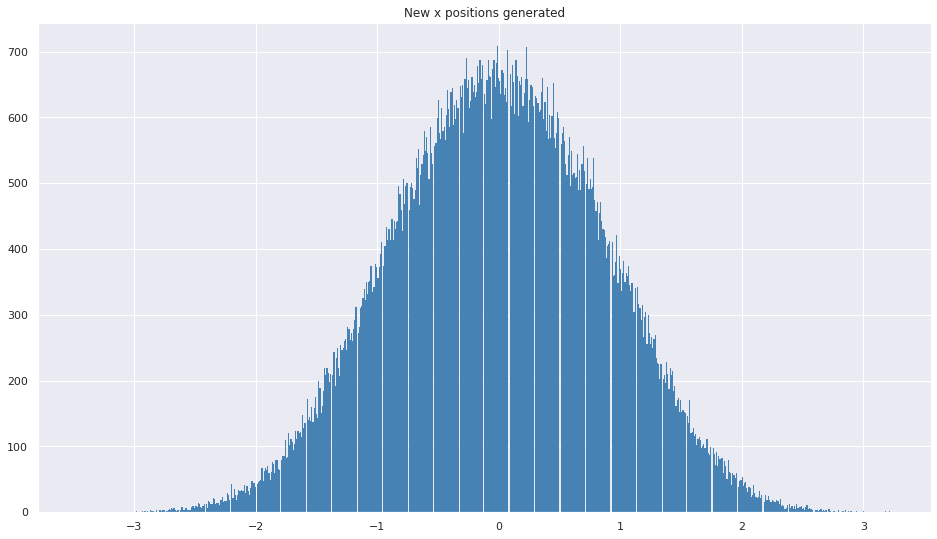

In [7]:
# %%writefile -a shm_mc.py
# to plot the new x positions generated

x = input("alpha_value for plotting new x positions generated ({} to {}), eg. 1.1 : "\
          .format(alpha_low,alpha_high-0.1))

x_pos_new_file = os.path.join(path[3],"alpha_"+ x +".txt")
q = np.loadtxt(x_pos_new_file)

val = q[:,1]

plt.figure(figsize = (16,9))
plt.hist(val,bins=700, color='steelblue', ec='steelblue', lw=0)
plt.title("New x positions generated")
# plt.scatter(x2[:,0],x2[:,1])
print("\nmean = {}, std_dev = {}".format(val.mean(), val.std()))
plt.show()

#### Plot of the new x positions accepted

alpha_value for plotting x positions accepted (0.5 to 1.5), eg. 1.1 : 1.1

mean = -0.0033224888165921105, std_dev = 0.6410990380028398


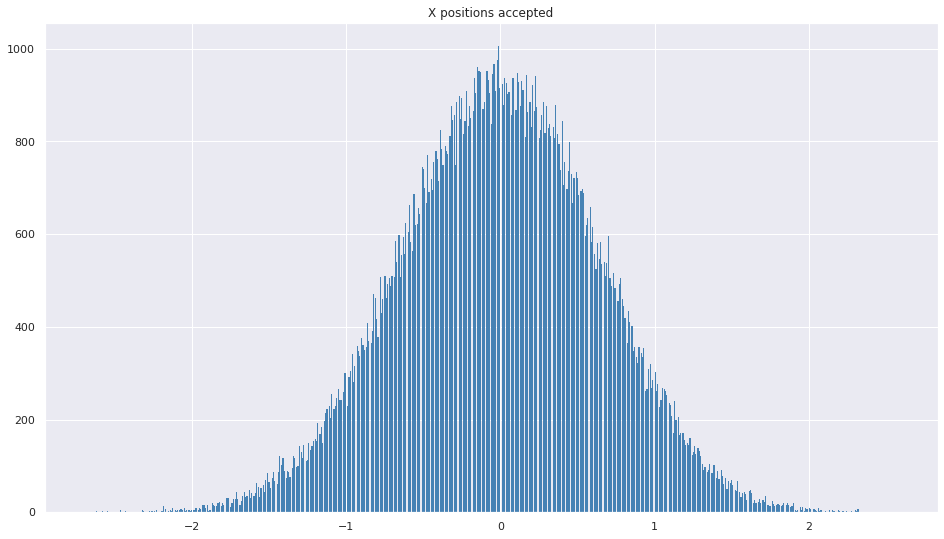

In [8]:
# %%writefile -a shm_mc.py
# to plot the x positions accepted

x = input("alpha_value for plotting x positions accepted ({} to {}), eg. 1.1 : "\
          .format(alpha_low,alpha_high-0.1))

x_pos_accpt_file = os.path.join(path[4],"alpha_"+ x +".txt")
q = np.loadtxt(x_pos_accpt_file)

val = q[:,1]

plt.figure(figsize = (16,9))
plt.hist(val,bins=700, color='steelblue', ec='steelblue', lw=0)
plt.title("X positions accepted")
# plt.scatter(x3[:,0],x2[:,1])
print("\nmean = {}, std_dev = {}".format(val.mean(), val.std()))
plt.show()